## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.761745  0.450223 -0.691078 -0.785985 -1.556605 -2.085724
1  1.507384 -0.520409 -0.625937 -1.531710  0.716068 -0.407826
2  0.954485  0.952883 -0.311632  0.859621 -1.018792  0.726020
3  0.395403  0.855944 -0.629655 -1.193196  1.380107  0.310516
4  0.219178  0.794815  1.293057  0.060563 -0.686437  0.736526


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9710992	total: 56.6ms	remaining: 56.5s
1:	learn: 0.9613541	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9515944	total: 57.6ms	remaining: 19.1s
3:	learn: 0.9426523	total: 58.1ms	remaining: 14.5s
4:	learn: 0.9341847	total: 58.7ms	remaining: 11.7s
5:	learn: 0.9240359	total: 59.1ms	remaining: 9.8s
6:	learn: 0.9137909	total: 59.8ms	remaining: 8.48s
7:	learn: 0.9046668	total: 60.3ms	remaining: 7.48s
8:	learn: 0.8961873	total: 60.8ms	remaining: 6.7s
9:	learn: 0.8883907	total: 61.4ms	remaining: 6.08s
10:	learn: 0.8796812	total: 61.8ms	remaining: 5.56s
11:	learn: 0.8702846	total: 62.4ms	remaining: 5.14s
12:	learn: 0.8615727	total: 62.9ms	remaining: 4.78s
13:	learn: 0.8533692	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8456867	total: 64ms	remaining: 4.21s
15:	learn: 0.8373308	total: 64.6ms	remaining: 3.97s
16:	learn: 0.8294449	total: 65ms	remaining: 3.76s
17:	learn: 0.8216514	total: 65.5ms	remaining: 3.57s
18:	learn: 0.8136290	total: 66ms	remaining: 3.4s
1

114:	learn: 0.3649689	total: 110ms	remaining: 844ms
115:	learn: 0.3623696	total: 110ms	remaining: 840ms
116:	learn: 0.3599395	total: 111ms	remaining: 835ms
117:	learn: 0.3572904	total: 111ms	remaining: 830ms
118:	learn: 0.3550819	total: 111ms	remaining: 825ms
119:	learn: 0.3528463	total: 112ms	remaining: 821ms
120:	learn: 0.3506944	total: 112ms	remaining: 817ms
121:	learn: 0.3479361	total: 113ms	remaining: 813ms
122:	learn: 0.3453787	total: 113ms	remaining: 808ms
123:	learn: 0.3424492	total: 114ms	remaining: 804ms
124:	learn: 0.3402264	total: 114ms	remaining: 800ms
125:	learn: 0.3377929	total: 115ms	remaining: 796ms
126:	learn: 0.3352865	total: 115ms	remaining: 791ms
127:	learn: 0.3326054	total: 116ms	remaining: 787ms
128:	learn: 0.3299289	total: 116ms	remaining: 783ms
129:	learn: 0.3274451	total: 116ms	remaining: 779ms
130:	learn: 0.3251681	total: 117ms	remaining: 775ms
131:	learn: 0.3228030	total: 117ms	remaining: 771ms
132:	learn: 0.3205031	total: 118ms	remaining: 768ms
133:	learn: 

282:	learn: 0.1135540	total: 186ms	remaining: 472ms
283:	learn: 0.1128757	total: 188ms	remaining: 473ms
284:	learn: 0.1123141	total: 188ms	remaining: 472ms
285:	learn: 0.1116794	total: 188ms	remaining: 470ms
286:	learn: 0.1110056	total: 189ms	remaining: 469ms
287:	learn: 0.1101735	total: 189ms	remaining: 468ms
288:	learn: 0.1094629	total: 190ms	remaining: 467ms
289:	learn: 0.1087454	total: 190ms	remaining: 466ms
290:	learn: 0.1080941	total: 191ms	remaining: 464ms
291:	learn: 0.1074365	total: 191ms	remaining: 463ms
292:	learn: 0.1067315	total: 191ms	remaining: 462ms
293:	learn: 0.1061354	total: 192ms	remaining: 461ms
294:	learn: 0.1054291	total: 192ms	remaining: 460ms
295:	learn: 0.1049569	total: 193ms	remaining: 459ms
296:	learn: 0.1042584	total: 193ms	remaining: 458ms
297:	learn: 0.1035192	total: 194ms	remaining: 457ms
298:	learn: 0.1029092	total: 194ms	remaining: 455ms
299:	learn: 0.1023293	total: 195ms	remaining: 454ms
300:	learn: 0.1017498	total: 195ms	remaining: 453ms
301:	learn: 

500:	learn: 0.0333387	total: 293ms	remaining: 292ms
501:	learn: 0.0331732	total: 293ms	remaining: 291ms
502:	learn: 0.0329984	total: 294ms	remaining: 291ms
503:	learn: 0.0328114	total: 295ms	remaining: 290ms
504:	learn: 0.0326273	total: 295ms	remaining: 289ms
505:	learn: 0.0324330	total: 295ms	remaining: 288ms
506:	learn: 0.0322160	total: 296ms	remaining: 288ms
507:	learn: 0.0320470	total: 296ms	remaining: 287ms
508:	learn: 0.0318359	total: 297ms	remaining: 286ms
509:	learn: 0.0317042	total: 297ms	remaining: 286ms
510:	learn: 0.0314993	total: 298ms	remaining: 285ms
511:	learn: 0.0313713	total: 298ms	remaining: 284ms
512:	learn: 0.0312558	total: 299ms	remaining: 284ms
513:	learn: 0.0310850	total: 299ms	remaining: 283ms
514:	learn: 0.0309169	total: 300ms	remaining: 282ms
515:	learn: 0.0307561	total: 300ms	remaining: 282ms
516:	learn: 0.0305922	total: 301ms	remaining: 281ms
517:	learn: 0.0304192	total: 301ms	remaining: 280ms
518:	learn: 0.0302412	total: 302ms	remaining: 280ms
519:	learn: 

660:	learn: 0.0176297	total: 370ms	remaining: 190ms
661:	learn: 0.0175841	total: 370ms	remaining: 189ms
662:	learn: 0.0174896	total: 371ms	remaining: 188ms
663:	learn: 0.0174399	total: 371ms	remaining: 188ms
664:	learn: 0.0173856	total: 372ms	remaining: 187ms
665:	learn: 0.0173328	total: 372ms	remaining: 187ms
666:	learn: 0.0172842	total: 373ms	remaining: 186ms
667:	learn: 0.0172136	total: 373ms	remaining: 185ms
668:	learn: 0.0171449	total: 373ms	remaining: 185ms
669:	learn: 0.0170975	total: 374ms	remaining: 184ms
670:	learn: 0.0170623	total: 374ms	remaining: 184ms
671:	learn: 0.0169810	total: 375ms	remaining: 183ms
672:	learn: 0.0169152	total: 375ms	remaining: 182ms
673:	learn: 0.0168354	total: 376ms	remaining: 182ms
674:	learn: 0.0167891	total: 376ms	remaining: 181ms
675:	learn: 0.0167521	total: 377ms	remaining: 180ms
676:	learn: 0.0166737	total: 377ms	remaining: 180ms
677:	learn: 0.0166316	total: 377ms	remaining: 179ms
678:	learn: 0.0165861	total: 378ms	remaining: 179ms
679:	learn: 

880:	learn: 0.0082523	total: 476ms	remaining: 64.3ms
881:	learn: 0.0082099	total: 477ms	remaining: 63.8ms
882:	learn: 0.0081603	total: 477ms	remaining: 63.2ms
883:	learn: 0.0081512	total: 478ms	remaining: 62.7ms
884:	learn: 0.0081096	total: 478ms	remaining: 62.1ms
885:	learn: 0.0081006	total: 478ms	remaining: 61.6ms
886:	learn: 0.0080598	total: 479ms	remaining: 61ms
887:	learn: 0.0080116	total: 479ms	remaining: 60.5ms
888:	learn: 0.0080027	total: 480ms	remaining: 59.9ms
889:	learn: 0.0079627	total: 480ms	remaining: 59.3ms
890:	learn: 0.0079157	total: 481ms	remaining: 58.8ms
891:	learn: 0.0079053	total: 481ms	remaining: 58.3ms
892:	learn: 0.0078593	total: 482ms	remaining: 57.7ms
893:	learn: 0.0078201	total: 482ms	remaining: 57.2ms
894:	learn: 0.0078116	total: 483ms	remaining: 56.6ms
895:	learn: 0.0077731	total: 483ms	remaining: 56.1ms
896:	learn: 0.0077283	total: 484ms	remaining: 55.5ms
897:	learn: 0.0077215	total: 484ms	remaining: 55ms
898:	learn: 0.0077176	total: 485ms	remaining: 54.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

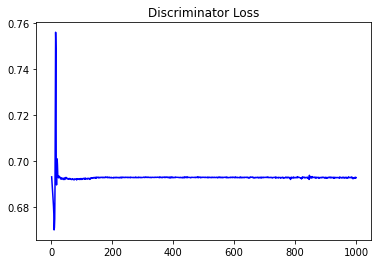

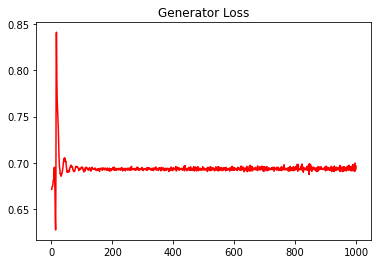

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11335567102384353


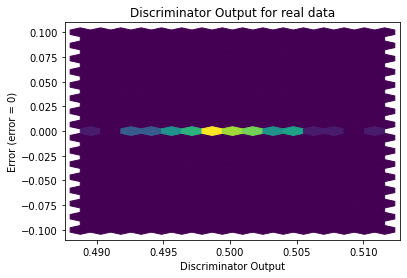

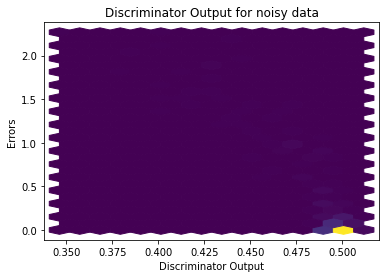

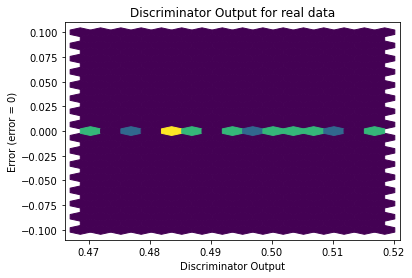

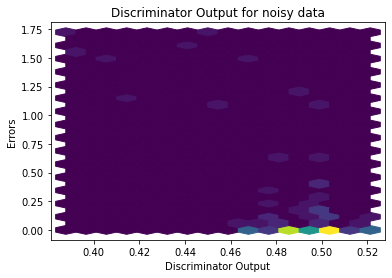

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


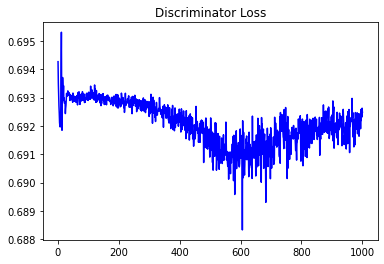

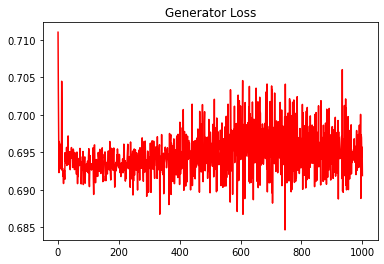

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09140381368013366


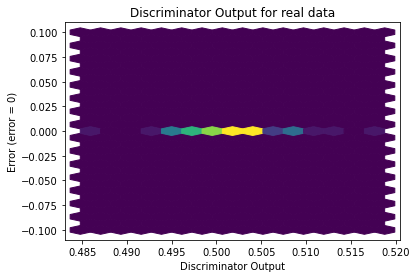

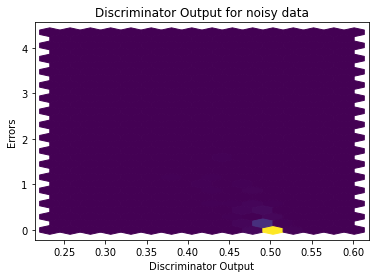

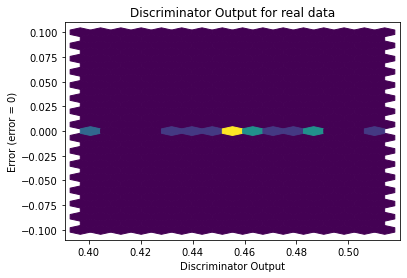

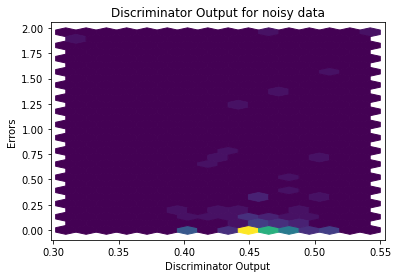

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1476]], requires_grad=True)
